This notebook solves Example 6.5 from Shumway & Stoffer (2017) using [DLMtools](https://github.com/SebastianGlavind/Probabilistic_modeling_and_analysis/blob/main/State-space-models/DLMtools.py). 

***
Shumway, R. H. & Stoffer, D. S. (2017). Time series analysis and its applications, Springer.

In [1]:
import numpy as np
# import scipy.stats as ss
# from scipy.optimize import minimize 
# from skopt import gp_minimize
from matplotlib import pyplot as plt
%matplotlib inline

# Import my kalman filter toolbox
import DLMtools as dlmt

In [2]:
# Generate data
np.random.seed(42); num1 = 50
w1 = np.random.normal(size=num1+1); v1 = np.random.normal(size=num1)
mu1 = np.cumsum(w1) # state: mu[0], mu[1],..., mu[50]
y1 = mu1[1:] + v1 # obs: y[1],..., y[50]

In [3]:
xp0, Pp0, xf0, Pf0, xs0, Ps0, negLogLike0 = dlmt.myKalmanSmoother0(y=y1.reshape(-1,1),
                                                                   cQ=np.array([1.]).reshape(-1,1), cR=np.array([1.]).reshape(-1,1), 
                                                                   mu0 = np.array([0.]).reshape(-1,1), Sigma0 = np.array([1.]).reshape(-1,1), 
                                                                   A = np.array([1.]).reshape(-1,1), Phi = np.array([1.]).reshape(-1,1) )

xp0 = np.array(xp0); Pp0 = np.array(Pp0)
xf0 = np.array(xf0); Pf0 = np.array(Pf0)
xs0 = np.array(xs0); Ps0 = np.array(Ps0)

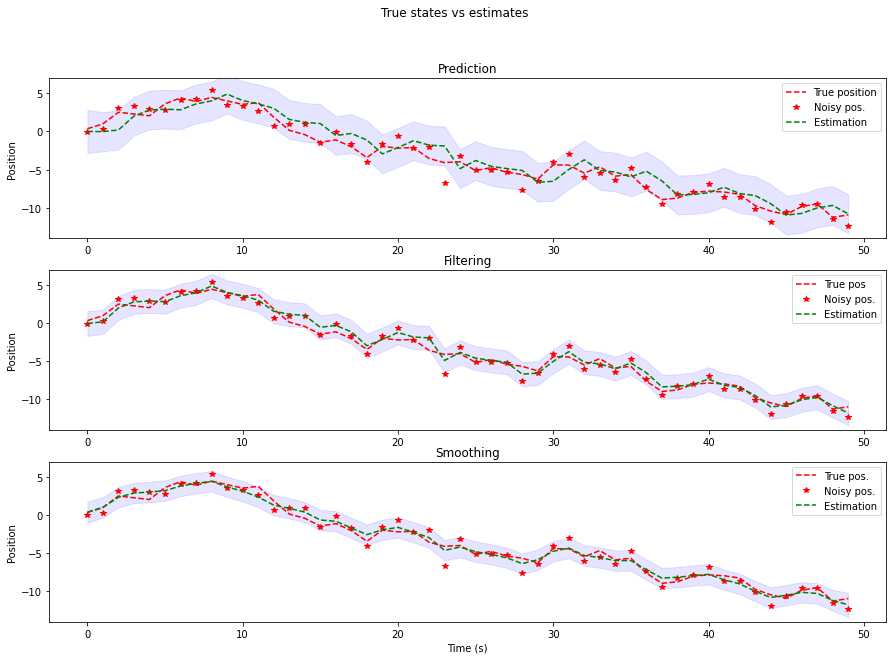

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,10))
fig.suptitle('True states vs estimates')

ax1.plot(mu1[1:], 'r--', label='True position')
ax1.plot(y1, 'r*', label='Noisy pos.')
ax1.plot(xp0[:,0,0], 'g--', label='Estimation')
ax1.fill_between(x=np.arange(0,num1,1), y1=xp0[:,0,0]-2*np.sqrt(Pp0[:,0,0]), y2=xp0[:,0,0]+2*np.sqrt(Pp0[:,0,0]), alpha=0.1, color='blue');
ax1.set_ylim([-14,7])
ax1.set_ylabel("Position")
ax1.set_title("Prediction")
ax1.legend(loc='upper right')

ax2.plot(mu1[1:], 'r--', label='True pos')
ax2.plot(y1, 'r*', label='Noisy pos.')
ax2.plot(xf0[:,0,0], 'g--', label='Estimation')
ax2.fill_between(x=np.arange(0,num1,1), y1=xf0[:,0,0]-2*np.sqrt(Pf0[:,0,0]), y2=xf0[:,0,0]+2*np.sqrt(Pf0[:,0,0]), alpha=0.1, color='blue');
ax2.set_ylim([-14,7])
ax2.set_ylabel("Position")
ax2.set_title("Filtering")
ax2.legend(loc='upper right')

ax3.plot(mu1[1:], 'r--', label='True pos.')
ax3.plot(y1, 'r*', label='Noisy pos.')
ax3.plot(xs0[:,0,0], 'g--', label='Estimation')
ax3.fill_between(x=np.arange(0,num1,1), y1=xs0[:,0,0]-2*np.sqrt(Ps0[:,0,0]), y2=xs0[:,0,0]+2*np.sqrt(Ps0[:,0,0]), alpha=0.1, color='blue');
ax3.set_ylim([-14,7])
ax3.set_ylabel("Position")
ax3.set_xlabel("Time (s)")
ax3.set_title("Smoothing")
ax3.legend(loc='upper right')

plt.show()

In [5]:
from filterpy.kalman import KalmanFilter

def pos_filterpy(x, P=np.array([[1.]]), R=np.array([[1.]]), Q=np.array([[1.]])):
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([[x[0]]]) # location and velocity
    kf.F = np.array([[1.]]) # state transition matrix
    kf.H = np.array([[1.]]) # Measurement function
    kf.R = R # measurement uncertainty
    kf.P[:] = P
    kf.Q[:] = Q
    return kf

def run_pos_filterpy(zs, x0=np.array([0.])):
    # create the Kalman filter
    kf = pos_filterpy(x0)
    # run the kalman filter and store the results
    xs, cov = [], []
    for z in zs:
        kf.predict()
        kf.update(z)
        xs.append(kf.x)
        cov.append(kf.P)
    xs, cov = np.array(xs), np.array(cov)
    
    return xs, cov

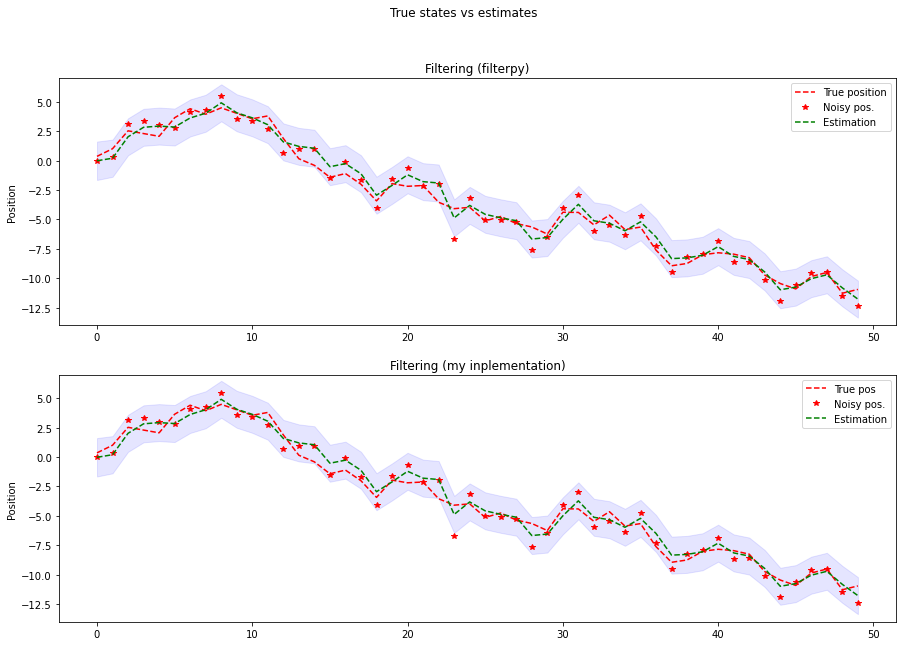

In [6]:
xf_fpy, Pf_fpy = run_pos_filterpy(y1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
fig.suptitle('True states vs estimates')

ax1.plot(mu1[1:], 'r--', label='True position')
ax1.plot(y1, 'r*', label='Noisy pos.')
ax1.plot(xf_fpy[:,0,0], 'g--', label='Estimation')
ax1.fill_between(x=np.arange(0,num1,1), y1=xf_fpy[:,0,0]-2*np.sqrt(Pf_fpy[:,0,0]), y2=xf_fpy[:,0,0]+2*np.sqrt(Pf_fpy[:,0,0]), alpha=0.1, color='blue');
ax1.set_ylim([-14,7])
ax1.set_ylabel("Position")
ax1.set_title("Filtering (filterpy)")
ax1.legend(loc='upper right')

ax2.plot(mu1[1:], 'r--', label='True pos')
ax2.plot(y1, 'r*', label='Noisy pos.')
ax2.plot(xf0[:,0,0], 'g--', label='Estimation')
ax2.fill_between(x=np.arange(0,num1,1), y1=xf0[:,0,0]-2*np.sqrt(Pf0[:,0,0]), y2=xf0[:,0,0]+2*np.sqrt(Pf0[:,0,0]), alpha=0.1, color='blue');
ax2.set_ylim([-14,7])
ax2.set_ylabel("Position")
ax2.set_title("Filtering (my inplementation)")
ax2.legend(loc='upper right')

plt.show()